# **Oasis Infobyte Intenship**
## Task 3: Car Price Prediction with Machine Learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more. Car priceprediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

### **Step 1 : Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


### **Step 2 : Load the Dataset**

In [ ]:
df=pd.read_csv("car data.csv")

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### **Step 3 : Explore the Dataset**

In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [ ]:
#  Explore Total number of Rows and columns

print("No of rows and columns:",df.shape)
print("Total no of rows and columns:",df.size)

No of rows and columns: (301, 9)
Total no of rows and columns: 2709


In [ ]:
# Explore the Dimension of the dataset

print("The Dimension of the dataset is:",df.ndim)

The Dimension of the dataset is: 2


In [ ]:
# Total Columns name in dataset

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Explore the data types of each column

df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [ ]:
# Checking Structural Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking Statistical Summary of the dataset

df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Checking Null values present ot not'

df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking the totol null values count in the dataset

df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
# Unique values of categorical features
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [ ]:
print(df['Selling_type'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']


In [ ]:
# Explore duplicate values

# Loop through each column and find duplicate values
col_names = ['Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

for col in col_names:
    duplicates = df[df.duplicated(subset=[col], keep=False)]
    if not duplicates.empty:
        print(f"🔁 Duplicate values in column '{col}':")
        print(df[col].value_counts().loc[lambda x: x > 1])
        print("\n")


🔁 Duplicate values in column 'Driven_kms':
Driven_kms
15000    9
45000    9
40000    5
25000    5
50000    5
35000    5
6000     4
24000    4
19000    4
43000    4
60000    4
12000    3
58000    3
11000    3
4000     3
18000    3
32000    3
14000    3
26000    3
36000    3
7000     3
30000    3
23000    3
29000    2
75000    2
72000    2
8700     2
62000    2
89000    2
49000    2
500      2
5000     2
17000    2
1300     2
3000     2
33000    2
20000    2
38000    2
47000    2
6900     2
78000    2
71000    2
31427    2
16500    2
53000    2
27000    2
34000    2
Name: count, dtype: int64


🔁 Duplicate values in column 'Fuel_Type':
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


🔁 Duplicate values in column 'Selling_type':
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


🔁 Duplicate values in column 'Transmission':
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


🔁 Duplicate values in column 'Owner':

### **Step 4: Visualize the data**


<Axes: >

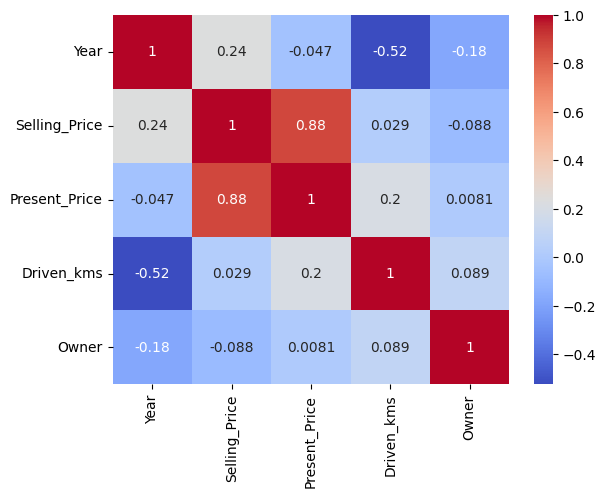

In [ ]:
# Heatmap of Correlation Matrix

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


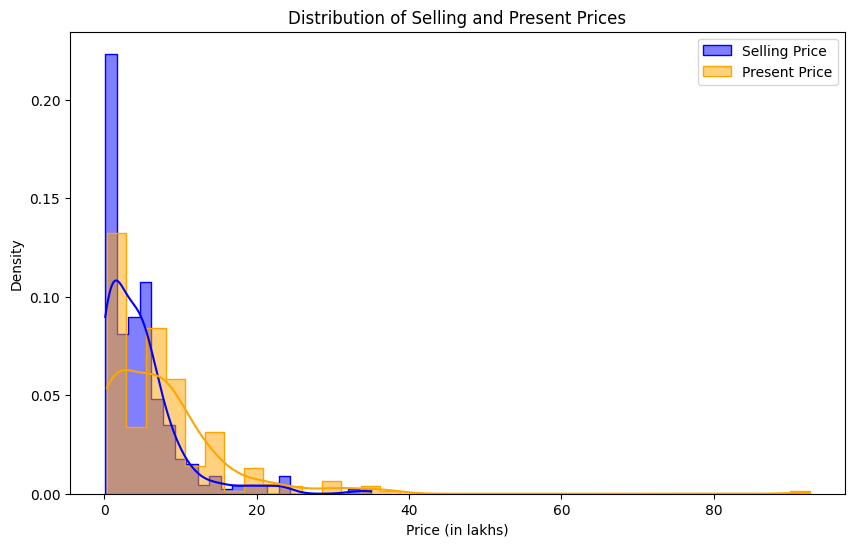

In [ ]:
# 1. Distribution Plot of Car Prices


plt.figure(figsize=(10, 6))

sns.histplot(df['Selling_Price'], color='blue', label='Selling Price', kde=True, stat="density", element="step")
sns.histplot(df['Present_Price'], color='orange', label='Present Price', kde=True, stat="density", element="step")

plt.title('Distribution of Selling and Present Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Density')
plt.legend()
plt.show()



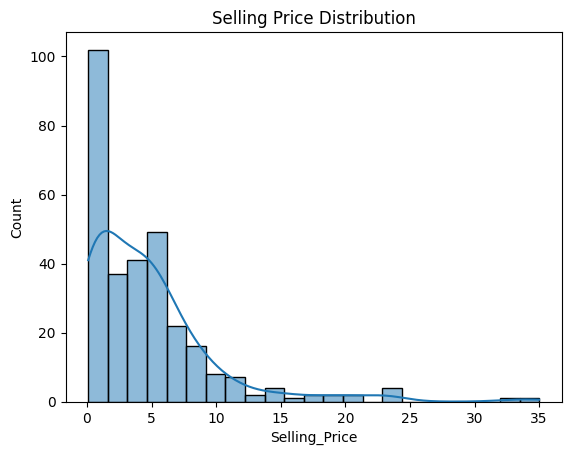

In [ ]:
# 2. Selling Price Distribution

sns.histplot(df['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')
plt.show()


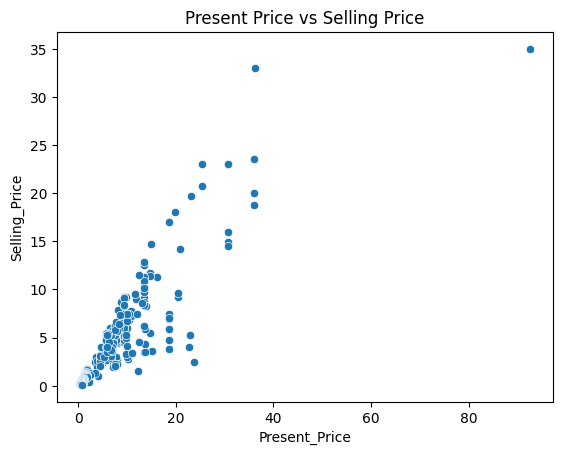

In [ ]:
# 3. Selling Price vs Present Price

sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Present Price vs Selling Price')
plt.show()

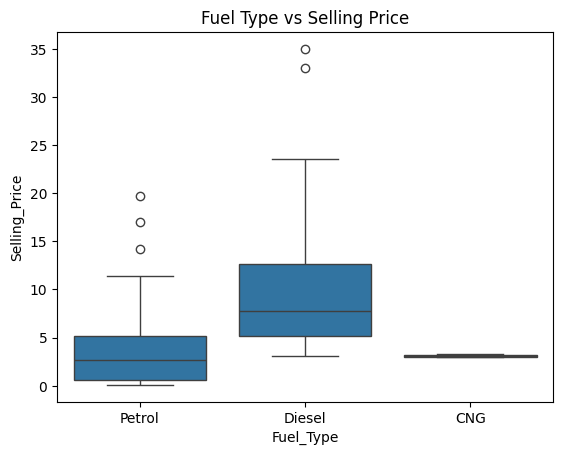

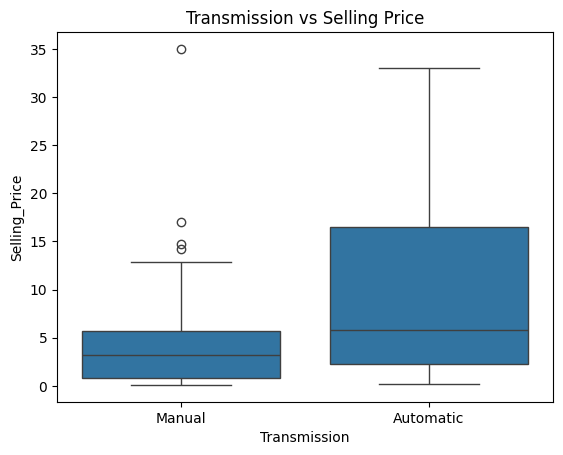

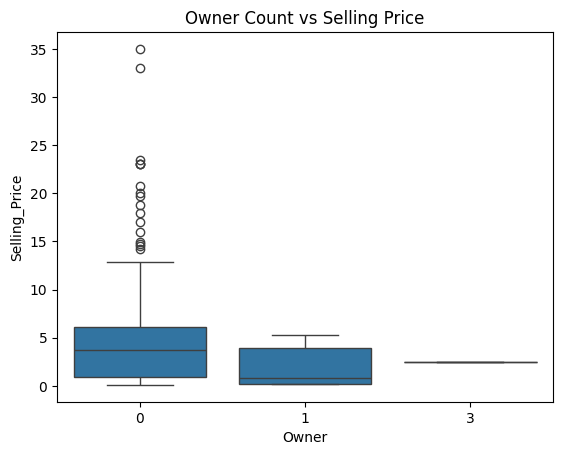

In [ ]:
# 4 . Fuel Type, Transmission, Owner vs Price

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()

sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Transmission vs Selling Price")
plt.show()

sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title("Owner Count vs Selling Price")
plt.show()

### **Step 5 : Preprocess the Data**


In [ ]:
# Calculate Car Age

df['Car_Age'] = 2025 - df['Year']
print(df['Car_Age'])

0      11
1      12
2       8
3      14
4      11
       ..
296     9
297    10
298    16
299     8
300     9
Name: Car_Age, Length: 301, dtype: int64


In [ ]:
# Drop the unnecessary columns
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)
print(df.columns)

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Car_Age'],
      dtype='object')


In [ ]:
# Encode Categorical Variables

le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])         # Petrol:2, Diesel:1, CNG:0
df['Selling_type'] = le.fit_transform(df['Selling_type'])   # Dealer:1, Individual:0
df['Transmission'] = le.fit_transform(df['Transmission'])   # Manual:1, Automatic:0

In [ ]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### **Step 6 : Evaluate the model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE:  0.64
MSE:  0.94
RMSE: 0.97
R² Score: 0.9593
MAPE: 17.65%


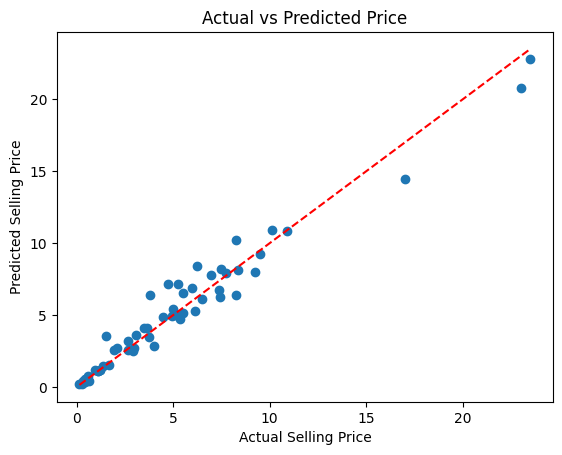

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



# **✅ Conclusion:**
### In this machine learning project, we predicted the resale price of a car using various features such as Present Price, Driven KMs, Fuel Type, Transmission, Owner, and Car Age. After cleaning and encoding the dataset, we used a Random Forest Regressor for modeling. The model achieved a good R² score, indicating it can effectively learn the patterns between car features and price. This project highlights how machine learning can be applied to real-world pricing problems, making it useful for businesses in the automotive resale market.